# [1] Imports + Dataset 

### Imports

#### Imports Libs

In [1]:
#### Import Libs
import joblib
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#### Import Classification Models 

In [2]:
#### Import Models for CLASSIFICATION 
from sklearn.linear_model import LogisticRegression  # Logistic Regression 
from sklearn.svm import SVC                          # Import SVM
from sklearn.neighbors import KNeighborsClassifier   # Import KNN
from sklearn.ensemble import RandomForestClassifier  # Import Random Fores

#### Import Classification Metrics 

In [3]:
#### Import Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef # Matthews Correlation Co-efficient 
from sklearn.metrics import precision_recall_curve, auc

### Load Dataset 

In [4]:
df = pd.read_csv("C:\\Users\\Niloufar\\Desktop\\Mehdi\\AutoML\\healthcare-dataset-stroke-data.csv")
df_original = df
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Niloufar\\Desktop\\Mehdi\\AutoML\\healthcare-dataset-stroke-data.csv'

# [2] EDA Basics 

###  Get Shape + Describe

In [ ]:
df.shape

(5110, 12)

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Get Info + Dtypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


###  Identify Duplicates

In [ ]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


### Identify Dataset Imbalance

In [ ]:
target_counts = df['stroke'].value_counts()

In [ ]:
print(target_counts)

stroke
0    4860
1     249
Name: count, dtype: int64


### Identify Missing Values

In [ ]:
missing_values = df.isna().sum()
print(missing_values)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


# [3] EDA: Features

## Gender Feature Analysis

### Get unique values for Gender

In [ ]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

### Drop Other as there is only 1 instance of it

In [ ]:
df = df[df['gender'] != 'Other'] 

In [ ]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

### Change Male + Female to 1s and 0s

In [ ]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

C:\Users\Niloufar\AppData\Local\Temp\ipykernel_16132\2789109867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})


In [ ]:
df['gender'].value_counts()

gender
0    2994
1    2115
Name: count, dtype: int64

## Ever_Married Feature Analysis

### Change Yes + No to 1s and 0s

In [ ]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1756
Name: count, dtype: int64

In [ ]:
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})

C:\Users\Niloufar\AppData\Local\Temp\ipykernel_16132\692039358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})


In [ ]:
df['ever_married'].value_counts()

ever_married
1    3353
0    1756
Name: count, dtype: int64

## Smoking_status Feature Analysis

In [ ]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

In [ ]:
mapping = {'never smoked': 0, 'smokes': 1, 'formerly smoked': 2, 'Unknown': 3}
df['smoking_status'] = df['smoking_status'].map(mapping)

C:\Users\Niloufar\AppData\Local\Temp\ipykernel_16132\2388886789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_status'] = df['smoking_status'].map(mapping)


In [ ]:
df['smoking_status'].value_counts()

smoking_status
0    1892
3    1544
2     884
1     789
Name: count, dtype: int64

## Work_type Feature Analysis

In [ ]:
df['work_type'].value_counts()

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [ ]:
label_encoder_work_type = LabelEncoder()
df['work_type'] = label_encoder_work_type.fit_transform(df['work_type'])
df['work_type'].value_counts()

C:\Users\Niloufar\AppData\Local\Temp\ipykernel_16132\2040856994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['work_type'] = label_encoder_work_type.fit_transform(df['work_type'])


work_type
2    2924
3     819
4     687
0     657
1      22
Name: count, dtype: int64

## Residence_type Feature Analysis

In [ ]:
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64

In [ ]:
label_encoder_residence_type = LabelEncoder()
df['Residence_type'] = label_encoder_residence_type.fit_transform(df['Residence_type'])
df['Residence_type'].value_counts()

C:\Users\Niloufar\AppData\Local\Temp\ipykernel_16132\1375595298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Residence_type'] = label_encoder_residence_type.fit_transform(df['Residence_type'])


Residence_type
1    2596
0    2513
Name: count, dtype: int64

## BMI Feature Analysis

### Replace missing values in BMI with mean 

In [ ]:
mean_bmi = df['bmi'].mean()
df['bmi'].fillna(mean_bmi, inplace=True)
df['bmi'].isna().sum()

C:\Users\Niloufar\AppData\Local\Temp\ipykernel_16132\3598963861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi'].fillna(mean_bmi, inplace=True)


0

In [ ]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# [4] Datasets Splits: Training + Testing 

### Remove id

In [ ]:
df.drop('id', axis=1, inplace=True)

C:\Users\Niloufar\AppData\Local\Temp\ipykernel_16132\48924119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('id', axis=1, inplace=True)


In [ ]:
X = df.drop('stroke', axis=1)
y = df['stroke']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3831, 10)
(3831,)
(1278, 10)
(1278,)


In [ ]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4688,1,31.0,0,0,0,3,0,64.85,23.0,3
4478,1,40.0,0,0,1,3,0,65.29,28.3,0
3521,1,52.0,0,0,1,2,0,111.04,30.0,0
4355,0,79.0,1,0,1,3,0,76.64,19.5,0
3826,0,75.0,0,0,1,0,0,94.77,27.2,0
...,...,...,...,...,...,...,...,...,...,...
1533,0,54.0,0,0,1,2,1,207.79,38.6,0
2437,1,8.0,0,0,0,4,1,105.63,19.2,3
3165,1,50.0,0,0,1,2,0,59.48,26.6,3
92,0,57.0,0,0,0,3,1,68.02,37.5,0


# [5] Dataset Training

## Train Logistic Regression

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

C:\Users\Niloufar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Evaluate Training 

#### Training: Accuracy, Precision, Recall

In [ ]:
# Make predictions on the training set
y_pred_train = logistic_model.predict(X_train)

# Evaluate the model's performance on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)

# Print the evaluation metrics on the training set
print(f'Training Accuracy: {accuracy_train:.2f}')
print(f'Training Precision: {precision_train:.2f}')
print(f'Training Recall: {recall_train:.2f}')

training_score = logistic_model.score(X_train, y_train)
print("Training Score:", training_score)

Training Accuracy: 0.96
Training Precision: 0.50
Training Recall: 0.01
Training Score: 0.9558861915948839


#### Training : Confusion Matrix

In [ ]:
# Calculate and print the confusion matrix
print(confusion_matrix(y_train, y_pred_train))

[[3661    1]
 [ 168    1]]


In [ ]:
# Calculate the number of times the model predicted 1 or 0
count_predicted_1 = np.sum(y_pred_train == 1)
count_predicted_0 = np.sum(y_pred_train== 0)

print("***********************************************************")
print("       TRAINING: PREDICTED vs ACTUAL 1's + 0's    ")
print("***********************************************************")

print("Predicted 1's = ",  count_predicted_1)
print("Predicted 0's = ", count_predicted_0)

count_actual_1 = np.sum(y_test == 1)
count_actual_0 = np.sum(y_test == 0)
print("-------------------------------------------------------------")
print("Actual 1's = ", count_actual_1)
print("Actual 0's = ", count_actual_0)
print("-------------------------------------------------------------")


***********************************************************
       TRAINING: PREDICTED vs ACTUAL 1's + 0's    
***********************************************************
Predicted 1's =  2
Predicted 0's =  3829
-------------------------------------------------------------
Actual 1's =  80
Actual 0's =  1198
-------------------------------------------------------------


In [ ]:
count_actual_1 = np.sum(y_train == 1)
count_actual_0 = np.sum(y_train == 0)
print(count_actual_1)
print(count_actual_0)

169
3662


### Training Model Co-Efficieints

In [ ]:
# Get the column names from the DataFrame
feature_names = X_train.columns

for feature, coefficient in zip(feature_names, logistic_model.coef_[0]):
    print(f'{feature}: {coefficient:.4f}')

gender: -0.1479
age: 0.0574
hypertension: 0.4221
heart_disease: 0.6595
ever_married: -0.7430
work_type: -0.2210
Residence_type: 0.5837
avg_glucose_level: 0.0033
bmi: -0.0361
smoking_status: 0.0221


In [ ]:
# Get the column names from the DataFrame
feature_names = X_train.columns

# Create a list of tuples containing feature names and coefficients
coefficients = list(zip(feature_names, logistic_model.coef_[0]))

# Sort the list based on the absolute values of coefficients in descending order
coefficients.sort(key=lambda x: abs(x[1]), reverse=True)

# Print the sorted coefficients
for feature, coefficient in coefficients:
    print(f'{feature}: {coefficient:.4f}')


ever_married: -0.7430
heart_disease: 0.6595
Residence_type: 0.5837
hypertension: 0.4221
work_type: -0.2210
gender: -0.1479
age: 0.0574
bmi: -0.0361
smoking_status: 0.0221
avg_glucose_level: 0.0033


# [6] Dataset Testing 

#### Predict

In [ ]:
y_pred = logistic_model.predict(X_test)

#### Get accuray, precision and recall for testing dataset 

In [ ]:
accuracy_test  = accuracy_score(y_test, y_pred)
precision_test = precision_score(y_test, y_pred)
recall_test    = recall_score(y_test, y_pred)

In [ ]:
print(f'Testing Accuracy: {accuracy_test:.2f}')
print(f'Testing Precision: {precision_test:.2f}')
print(f'Testing Recall: {recall_test:.2f}')

Testing Accuracy: 0.94
Testing Precision: 0.50
Testing Recall: 0.01


In [ ]:
# Calculate the number of times the model predicted 1 or 0 for TESTING
count_predicted_1 = np.sum(y_pred == 1)
count_predicted_0 = np.sum(y_pred == 0)
print(count_predicted_1)
print(count_predicted_0)

2
1276


In [ ]:
# Calculate and print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[1197    1]
 [  79    1]]


In [ ]:
# Assuming you have the actual labels in y_test
actual_values = y_test.iloc[rows_to_predict]

print(f"Actual values for rows {rows_to_predict}: {actual_values}")

Actual values for rows [92, 862]: 1971    0
1789    0
Name: stroke, dtype: int64


In [ ]:
# Assuming you have the actual labels in y_test
actual_values = y_test.iloc[rows_to_predict]

# Make predictions for the specific rows
specific_probabilities = logistic_model.predict_proba(specific_rows)

# Get the probabilities for the predicted classes
predicted_probabilities = specific_probabilities[:, 1]  # Assuming binary classification

print(f"Actual values for rows {rows_to_predict}: {actual_values}")
print(f"Predicted probabilities for rows {rows_to_predict}: {predicted_probabilities}")

Actual values for rows [92, 862]: 1971    0
1789    0
Name: stroke, dtype: int64
Predicted probabilities for rows [92, 862]: [0.18340051 0.01189539]


# [7] Error Analysis

### Get Confusion Matrix 

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract values from the confusion matrix
true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()

#### Get indices of false positives 

In [ ]:
#### Get indices of false positives 
false_positives_indices = (y_test == 0) & (y_pred == 1)

# Obtain the actual data points for false positives and false negatives
false_positives_data = X_test[false_positives_indices]

# Print or analyze the false positives and false negatives
print("False Positives INDICES:")
print(false_positives_data)

print("False Positives COUNTS:")
false_positives_indices.sum()

False Positives INDICES:
      gender   age  hypertension  heart_disease  ever_married  work_type  \
3461       0  63.0             1              1             0          0   

      Residence_type  avg_glucose_level   bmi  smoking_status  
3461               1             174.43  24.3               0  
False Positives COUNTS:


1

#### Get indices of false negatives

In [ ]:
# Get indices of false negatives
false_negatives_indices = (y_test == 1) & (y_pred == 0)

# Obtain the actual data points for false positives and false negatives
false_negatives_data = X_test[false_negatives_indices]

print("\nFalse Negatives INDICES:")
print(false_negatives_data)

print("\nFalse Negatives COUNTS:")
print(false_negatives_indices.sum())



False Negatives INDICES:
     gender   age  hypertension  heart_disease  ever_married  work_type  \
79        1  43.0             0              0             1          3   
33        1  80.0             0              1             1          3   
23        1  82.0             0              1             1          2   
65        1  78.0             1              0             0          2   
84        1  58.0             0              0             1          2   
..      ...   ...           ...            ...           ...        ...   
220       1  81.0             1              1             1          2   
198       1  79.0             0              0             1          2   
113       0  45.0             0              0             1          2   
73        1  63.0             0              0             1          2   
92        0  57.0             0              0             0          3   

     Residence_type  avg_glucose_level       bmi  smoking_status  
79    

#### Get actual feature values for the False positives

In [ ]:
import numpy as np

false_positives_indices = np.where((y_test == 0) & (y_pred == 1))[0]
false_positives_data = X_test.iloc[false_positives_indices]

print("False Positives:")
print(false_positives_data)

False Positives:
      gender   age  hypertension  heart_disease  ever_married  work_type  \
3461       0  63.0             1              1             0          0   

      Residence_type  avg_glucose_level   bmi  smoking_status  
3461               1             174.43  24.3               0  


# [8] SHAP

In [ ]:
!pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/e5/4c/a4785425971e7433a7d80fa0ff9cd9f5f35303d4e99446190d91c72648c9/shap-0.44.0-cp311-cp311-win_amd64.whl.metadata
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
   ---------------------------------------- 0.0/448.0 kB ? eta -:--:--
    --------------------------------------- 10.2/448.0 kB ? eta -:--:--
   ----------------------- ---------------- 266.2/448.0 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 448.0/448.0 kB 4.0 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
shap.initjs()

In [ ]:
# Fits the explainer
#explainer = shap.Explainer(logistic_model.predict, X_train)
explainer = shap.Explainer(logistic_model.predict, X_test)

shap_values = explainer(X_test)

ExactExplainer explainer: 1279it [00:21, 30.63it/s]                          


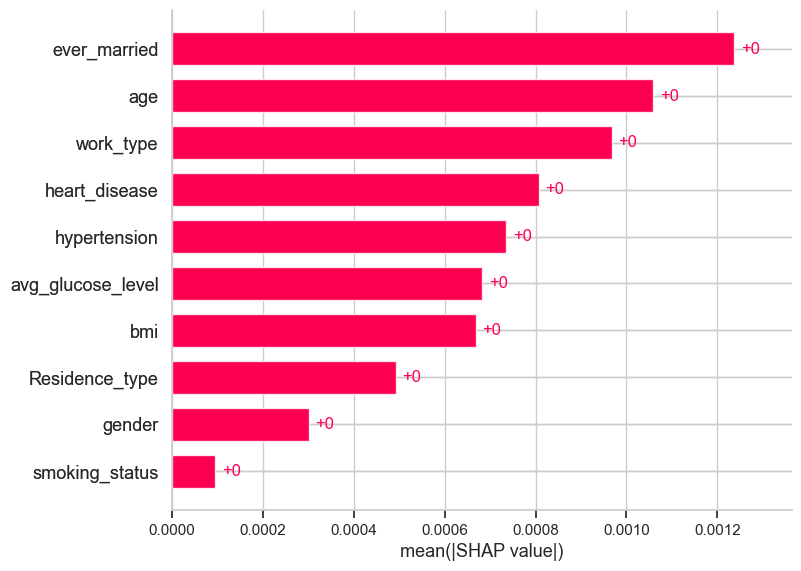

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
# Get SHAP values for the chosen instance
shap_values_instance = shap_values[0]

# Display the SHAP values for each feature
print("SHAP Values for the Chosen Instance:")
print(shap_values_instance)

SHAP Values for the Chosen Instance:
.values =
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

.base_values =
0.0

.data =
array([ 1.  , 31.  ,  0.  ,  0.  ,  0.  ,  3.  ,  0.  , 64.85, 23.  ,
        3.  ])


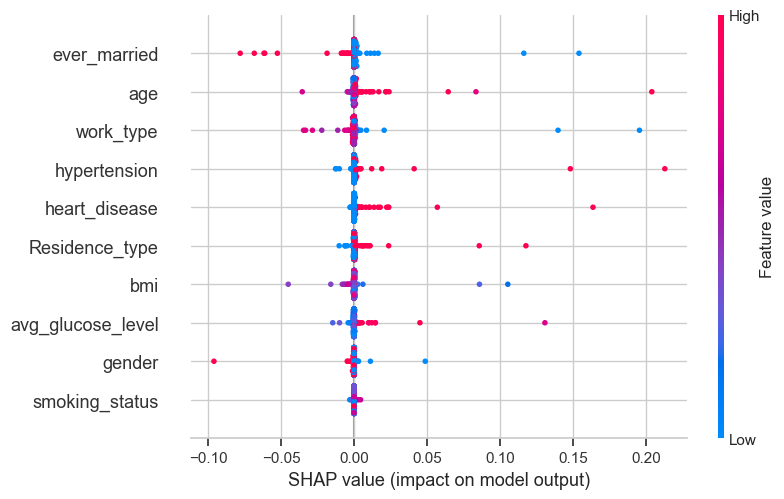

In [ ]:
shap.plots.beeswarm(shap_values)

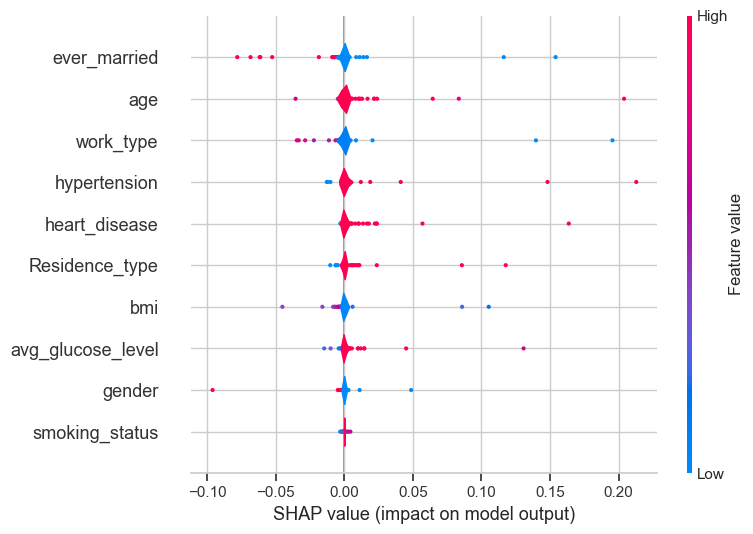

In [ ]:
shap.summary_plot(shap_values, plot_type='violin')

In [ ]:
shap.plots.waterfall(shap_values)

ValueError: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (1278, 10)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.

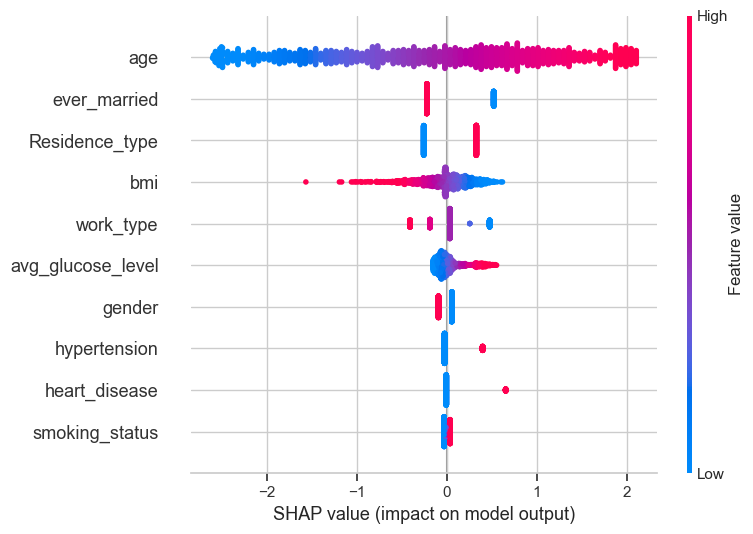

In [ ]:
shap.summary_plot(shap_values, X_test)

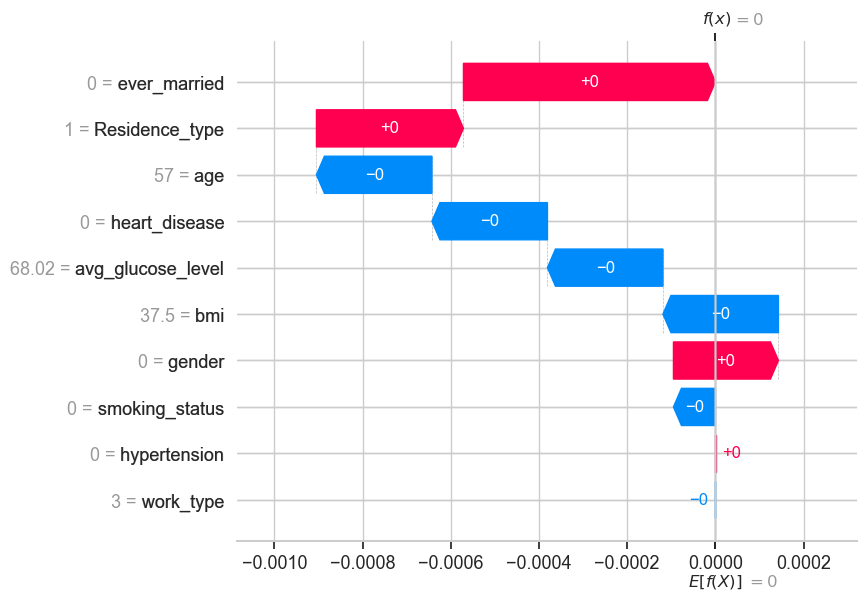

In [ ]:
shap.plots.waterfall(shap_values[1276])

# ------ IGNORE EVERYTHING BELOW  ------

# Pickle file 

In [ ]:
pickle.dump(logistic_model, open('logistic_regression_model.pkl', 'wb'))
#with open('logistic_regression_model.pkl', 'wb') as model_file:
#    joblib.dump(logistic_model, model_file)
    
print(f'Model saved to {logistic_model}')

Model saved to LogisticRegression()


In [ ]:
pickled_model = pickle.load(open('logistic_regression_model.pkl', 'rb'))
aa = pickled_model.predict(X_test)

In [ ]:
# Get unique values and their counts
unique_values, counts = np.unique(aa, return_counts=True)

# Print the unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"{value}: {count} times")

0: 1276 times
1: 2 times


### Test Pickle File 

In [ ]:
rows_to_predict = [92, 862]

# Extract the specific rows from X_test
specific_rows = X_test.iloc[rows_to_predict]

# Get the actual values for the specified rows
actual_values = y_test.iloc[rows_to_predict]

# Make predictions for the specific rows
specific_probabilities = pickled_model.predict_proba(specific_rows)

# Get the probabilities for the predicted classes
predicted_probabilities = specific_probabilities[:, 1]  # Assuming binary classification

print(f"Actual values for rows {rows_to_predict}: {actual_values}")
print(f"Predicted probabilities for rows {rows_to_predict}: {predicted_probabilities}")

Actual values for rows [92, 862]: 1971    0
1789    0
Name: stroke, dtype: int64
Predicted probabilities for rows [92, 862]: [0.18340051 0.01189539]


In [ ]:
st.warning("_TPLEASE READ his application was created for educational purposes. Results MUST not under any circumstances be used for medical purposes._")

NameError: name 'st' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   int32  
 6   Residence_type     5109 non-null   int32  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   int64  
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int32(2), int64(6)
memory usage: 439.1 KB
